In [24]:
# Task 1.1 

# importing numpy and linear algebra library
import numpy as np;

data = np.loadtxt("boston.data",skiprows=24);

dataShape = data.shape;
print ("data.shape:", dataShape);

dataRow = dataShape[0];
trainDataRow = int(dataRow*0.8);

trainingSet = data[:trainDataRow,:];
testSet = data[trainDataRow:,:];
trainDataShape = trainingSet.shape;
testDataShape = testSet.shape;
print("trainingSet.shape:",trainDataShape);
print("testSet.shape:",testDataShape);

data.shape: (506, 14)
trainingSet.shape: (404, 14)
testSet.shape: (102, 14)


In [25]:
#Task 1.2 

from numpy import dot;
from numpy.linalg import inv;

def prepend_one(X):
    
    """prepend a one vector to X."""
    
    # get number of training points
    n_trains = X.shape[0];       
    # creat a column vector (dim = nx1) with values of 1s only.
    ones = np.ones(X.shape[0]);
    
    # create new data matrix of linear features.
    phi_X = np.column_stack([np.ones(X.shape[0]), X]);
    
    return phi_X;

X, y = trainingSet[:, :13], trainingSet[:, 13];
print ("X.shape:", X.shape);
print ("y.shape:", y.shape);
X_test, y_test = testSet[:, :13], testSet[:, 13];
print ("X_test:", X_test.shape);
print ("y_test:", y_test.shape);

PHI_X = prepend_one(X);
print("PHI_X.shape:", PHI_X.shape);

# β = (((X^T * X)^-1 )* X^T)* y

beta_ = dot(dot(inv(dot(PHI_X.T, PHI_X)), PHI_X.T), y);


#computing training and testing error
def error_computing(PHI,beta_,ground_truth):
    y_predicted = dot(PHI,beta_);
    err =  np.linalg.norm(y_predicted - ground_truth)/len(ground_truth);
    return err
   
#Training error    
err_training = error_computing(PHI_X,beta_,y)
print("Training error is",err_training)


#computing The feature matrix for X_test
PHI_X_test = prepend_one(X_test)
#Testing error  
err_test = error_computing(PHI_X_test,beta_,y_test)
print("Testing error is",err_test)



X.shape: (404, 13)
y.shape: (404,)
X_test: (102, 13)
y_test: (102,)
PHI_X.shape: (404, 14)
Training error is 0.23744921042027042
Testing error is 0.5670690268198522


In [26]:
#Task 1.3   

#ϕquadratic (x)=[1, x1 ,…, xd , x1^2 , x1 x2 , x1 x3,…, xi x j ,…, xd^2 ]
def quadratic_feature(X):
    """append squared X."""
    result = X;
    cols = X.shape[1];
    for i in range(0,cols):
        for j in range(i,cols):
            result = np.column_stack([result,np.multiply(X[:,i],X[:,j])]);
    return prepend_one(result);
#ϕcubic(x )=[1 , x1 ,…, xd , x1^2 , x1 x2 , x1 x3,…, xi x j ,…, xd^2 , x1^3 , x2^3 ,…, xd^3 ]
def cubic_feature(X):
    result = quadratic_feature(X);
    cols = X.shape[1];
    for i in range(0,cols):
        for j in range(i,cols):
            for k in range(j,cols):
                temp = np.multiply(X[:,i],X[:,j]);
                result = np.column_stack([result,np.multiply(temp,X[:,k])]);
    return result;


PHI_X_Q = quadratic_feature(X);
print ("PHI_X_Q.shape:", PHI_X_Q.shape);

# β=(XT*X)^−1 *XT *Y

betaQ_ = dot(dot(np.linalg.pinv(dot(PHI_X_Q.T, PHI_X_Q)), PHI_X_Q.T), y);

print ("quadratic.beta.shape:", betaQ_.shape);
#print ("Optimal beta:", betaQ_);


PHI_X_C = cubic_feature(X);
print ("PHI_X_C.shape:", PHI_X_C.shape);
#print (PHI_X_C);

# β=(XT*X)^−1 *XT *Y

#betaC_ = dot(dot(inv(dot(PHI_X_C.T, PHI_X_C)), PHI_X_C.T), y);

betaC_ = dot(dot(np.linalg.pinv(dot(PHI_X_C.T, PHI_X_C)), PHI_X_C.T),y);


print ("cubic.beta.shape:", betaC_.shape);
#print ("Optimal beta:", betaC_);



   
#Training error of quadratic feature
err_training1 = error_computing(PHI_X_Q,betaQ_,y);
print("Training error of quadratic feature is",err_training1);

#computing The feature matrix for X_test
PHI_X_test1 = quadratic_feature(X_test);
#Testing error of quadratic feature
err_test1 = error_computing(PHI_X_test1,betaQ_,y_test);
print("Testing error of quadratic feature is",err_test1);



#Training error of cubic feature
err_training2 = error_computing(PHI_X_C,betaC_,y);
print("Training error of cubic feature is",err_training2);

#computing The feature matrix for X_test
PHI_X_test2 = cubic_feature(X_test);
#Testing error of cubic feature
err_test2 = error_computing(PHI_X_test2,betaC_,y_test);
print("Testing error of cubic feature is",err_test2);







PHI_X_Q.shape: (404, 105)
quadratic.beta.shape: (105,)
PHI_X_C.shape: (404, 560)
cubic.beta.shape: (560,)
Training error of quadratic feature is 0.10587977415314571
Testing error of quadratic feature is 1.2298227834650919
Training error of cubic feature is 0.0571241254559708
Testing error of cubic feature is 25.25932024211068


In [27]:
#Task 1.4

theta = 0.5;

# β(ridge)=(XT*X+λI)^−1 *XT *Y

#linear
Identity = np.identity(PHI_X.shape[1]);
XXT_inv = inv(np.add(dot(PHI_X.T, PHI_X),theta*Identity));
betaQ_ = dot(dot(XXT_inv, PHI_X.T),y);


#quadratic
Identity = np.identity(PHI_X_Q.shape[1]);
Identity[0,0] = 0 #ignore/not regularize bias term 
XXT_inv = np.linalg.pinv(np.add(dot(PHI_X_Q.T, PHI_X_Q),theta*Identity));
betaQ_ = dot(dot(XXT_inv, PHI_X_Q.T),y);

#cubic
Identity = np.identity(PHI_X_C.shape[1]);
Identity[0,0] = 0 #ignore/not regularize bias term
XXT_inv = np.linalg.pinv(np.add(dot(PHI_X_C.T, PHI_X_C),theta*Identity));
betaC_ = dot(dot(XXT_inv, PHI_X_C.T),y);




#Training error    
err_training = error_computing(PHI_X,beta_,y)
print("After ridge regression,Training error of linear feature is",err_training)


#computing The feature matrix for X_test
PHI_X_test = prepend_one(X_test)
#Testing error  
err_test = error_computing(PHI_X_test,beta_,y_test)
print("After ridge regression,Testing error of linear feature is is",err_test)


#Training error of quadratic feature
err_training1 = error_computing(PHI_X_Q,betaQ_,y);
print("After ridge regression,Training error of quadratic feature is",err_training1);

#computing The feature matrix for X_test
PHI_X_test1 = quadratic_feature(X_test);
#Testing error of quadratic feature
err_test1 = error_computing(PHI_X_test1,betaQ_,y_test);
print("After ridge regression,Testing error of quadratic feature is",err_test1);

#Training error of cubic feature
err_training2 = error_computing(PHI_X_C,betaC_,y);
print("After ridge regression,Training error of cubic feature is",err_training2);

#computing The feature matrix for X_test
PHI_X_test2 = cubic_feature(X_test);
#Testing error of cubic feature
err_test2 = error_computing(PHI_X_test2,betaC_,y_test);
print("After ridge regression,Testing error of cubic feature is",err_test2);



After ridge regression,Training error of linear feature is 0.23744921042027042
After ridge regression,Testing error of linear feature is is 0.5670690268198522
After ridge regression,Training error of quadratic feature is 0.10972997339214281
After ridge regression,Testing error of quadratic feature is 1.3564713658504823
After ridge regression,Training error of cubic feature is 0.05712294846560657
After ridge regression,Testing error of cubic feature is 25.26225642549084


linear feature with five_fold_cross_validation:
best lamda =  8
best best_cost =  0.5335914564575702
quadratic feature with five_fold_cross_validation
best lamda =  2097152
best best_cost =  0.5643487193979444
cubic feature with five_fold_cross_validation
best lamda =  549755813888
best best_cost =  0.8156613602767386


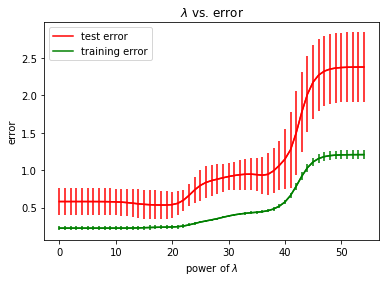

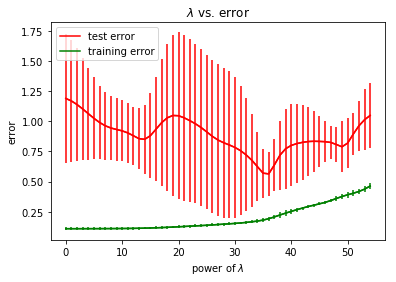

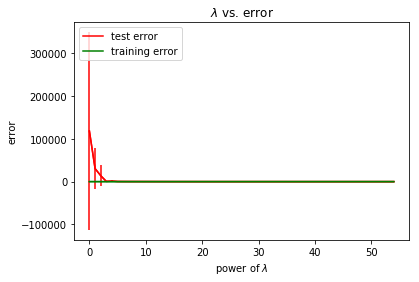

In [28]:
#Task 1.5

import matplotlib.pyplot as plt;

def k_fold_cross_validation(data, k, lamda,feature):
    n_data = data.shape[0]
    test_size = int(n_data/k)   
    
    #loop over k fold (each time leave one out to make a test set)  
    
    all_errors_test  = []
    all_errors_train = []
    for i in range(k):
        leave_out_data = data[test_size*i:test_size*(i+1),:]
        training_data  = data[0:test_size*i,:]
        training_data  = np.vstack((training_data,data[test_size*(i+1):,:]))
        
        # computing feature matrix
        X_training, y_training = training_data[:,:-1],training_data[:,-1]

        PHI_training_data = feature(X_training);
        
        
        Identity = np.identity(PHI_training_data.shape[1]) # identity matrix
        
        beta__ = dot(dot(inv(np.add(dot(PHI_training_data.T, PHI_training_data),lamda*Identity)), 
                         PHI_training_data.T), y_training);
        
        #computing error on the training dataset
        err_train = error_computing(PHI_training_data,beta__,y_training)
       
    
        #computing error on the leave_out dataset
        X_test, y_test = leave_out_data[:,:-1],leave_out_data[:,-1]
        PHI_leave_out_data = feature(X_test) 
        err_test = error_computing(PHI_leave_out_data,beta__,y_test)
        
        # add this test/training error for computing statistics
        all_errors_test.append(err_test)
        all_errors_train.append(err_train)
        
        
    # returning the mean and standard deviation of the cross-validated errors
    return np.mean(all_errors_test), np.std(all_errors_test),np.mean(all_errors_train), np.std(all_errors_train)


def five_fold_cross_validation(feature):
    k_fold = 5;

    num_candidates = 55;
    regular = np.zeros([num_candidates,5])

    best_lamda = 0;
    best_cost = 10000;

    # loop over num_candidates possible candidates of lambda
    for k in range(-15,40):
        lamda = 2** (k);
        mean_test, std_test, mean_train, mean_std = k_fold_cross_validation(data,k_fold,lamda,feature);
        
        regular[k+15,0] = lamda;
        regular[k+15,1:] = mean_test, std_test, mean_train, mean_std;

        if best_cost > mean_test:
            best_cost = mean_test;
            best_lamda = lamda;




    fig = plt.figure();
    fig = fig.add_subplot(1, 1, 1);
    plt.plot(np.arange(num_candidates),regular[:,1],'red',label="test error");
    plt.plot(np.arange(num_candidates),regular[:,3],'green',label="training error");

    # plotting the error bars (with standard deviations)
    plt.errorbar(np.arange(num_candidates),regular[:,1], yerr=regular[:,2], color='red');
    plt.errorbar(np.arange(num_candidates),regular[:,3], yerr=regular[:,4], color='green');

    plt.title(r"$\lambda$ vs. error");
    plt.legend(loc='upper left');
    plt.xlabel(r'power of $\lambda$');
    plt.ylabel('error');
    plt.draw();

    print('best lamda = ',best_lamda);
    print('best best_cost = ',best_cost);
    
print("linear feature with five_fold_cross_validation:");
five_fold_cross_validation(prepend_one);
print("quadratic feature with five_fold_cross_validation");
five_fold_cross_validation(quadratic_feature);
print("cubic feature with five_fold_cross_validation");
five_fold_cross_validation(cubic_feature);


In [29]:
#Task 2.1

bandwith = 1.0;
theta = 0.5;

def RBF_Features(X,C,bandwith):
    PHI = np.ones(X.shape[0]); # prepend ones
    for i in range(C.shape[0]): # loop over each center c_i
        distance = X - C[i,:]; # (difference from all x to center c_i)
        # square the difference, and use sum to compute the magnitude /llength of this difference vector
        distance_2 = np.sum(np.multiply(distance,distance),axis=1); 
        PHI_i = np.exp(-distance_2/(2*bandwith)) # feature i correspond to center c_i
        PHI = np.column_stack([PHI, PHI_i]) # stack all feature phi_i
    return PHI;

PHI_X_RBF = RBF_Features(X,X,bandwith);

# The beta is the same
# β= (XT*X+λI)^−1 *XT *Y

Identity = np.identity(PHI_X_RBF.shape[1]);
XXT_inv = inv(np.add(dot(PHI_X_RBF.T, PHI_X_RBF),theta*Identity));
betaRBF_ = dot(dot(XXT_inv, PHI_X_RBF.T),y);
print(np.shape(betaRBF_));
#print(betaRBF_);

#Training error of RBF feature
err_training = error_computing(PHI_X_RBF,betaRBF_,y);
print("Training error of RBF feature is",err_training);

#computing The feature matrix for X_test
PHI_X_test = RBF_Features(X_test,X,bandwith);

#Testing error of RBF feature
err_test = error_computing(PHI_X_test,betaRBF_,y_test);
print("Testing error of RBF feature is",err_test);


(405,)
Training error of RBF feature is 0.151721001578446
Testing error of RBF feature is 0.9535275947919808


RBF feature with five_fold_cross_validation:
best bandwith =  20.0
best best_cost =  0.924312890419797


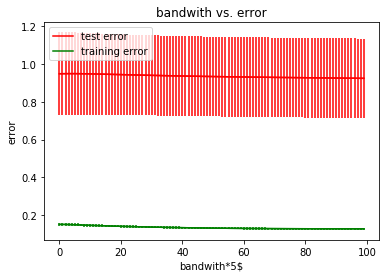

In [30]:
#Task 2.2

def k_fold_cross_validation_RBF(data, k,lamda,bandwidth):
    n_data = data.shape[0];
    test_size = int(n_data/k);   
    
    #loop over k fold (each time leave one out to make a test set)  
    
    all_errors_test  = []
    all_errors_train = []
    for i in range(k):
        leave_out_data = data[test_size*i:test_size*(i+1),:]
        training_data  = data[0:test_size*i,:]
        training_data  = np.vstack((training_data,data[test_size*(i+1):,:]))
        
        # computing feature matrix
        X_training, y_training = training_data[:,:-1],training_data[:,-1]

        PHI_training_data = RBF_Features(X_training,X_training,bandwidth);    
        
        Identity = np.identity(PHI_training_data.shape[1]) # identity matrix

        beta__ = dot(dot(inv(np.add(dot(PHI_training_data.T, PHI_training_data),lamda*Identity)), 
                         PHI_training_data.T), y_training);
        
        #computing error on the training dataset
        err_train = error_computing(PHI_training_data,beta__,y_training)
       
    
        #computing error on the leave_out dataset
        X_test, y_test = leave_out_data[:,:-1],leave_out_data[:,-1]
        PHI_leave_out_data = RBF_Features(X_test,X_training,bandwidth);
        err_test = error_computing(PHI_leave_out_data,beta__,y_test)
        
        # add this test/training error for computing statistics
        all_errors_test.append(err_test)
        all_errors_train.append(err_train)
        
        
    # returning the mean and standard deviation of the cross-validated errors
    return np.mean(all_errors_test), np.std(all_errors_test),np.mean(all_errors_train), np.std(all_errors_train)


def five_fold_cross_validation_RBF():
    k_fold = 5;
    lamda = 0.5;
    num_candidates = 100;
    regular = np.zeros([num_candidates,5])

    best_bandwith = 0;
    best_cost = 10000;

    # loop over num_candidates possible candidates of lambda
    for k in range(1,101):
        bandwith = 0.2 * k; 
        mean_test, std_test, mean_train, mean_std = k_fold_cross_validation_RBF(data,k_fold,lamda,bandwith);
        regular[k-1,0] = bandwith;
        regular[k-1,1:] = mean_test, std_test, mean_train, mean_std;

        if best_cost > mean_test:
            best_cost = mean_test;
            best_bandwith = bandwith;




    fig = plt.figure();
    fig = fig.add_subplot(1, 1, 1);
    plt.plot(np.arange(num_candidates),regular[:,1],'red',label="test error");
    plt.plot(np.arange(num_candidates),regular[:,3],'green',label="training error");

    # plotting the error bars (with standard deviations)
    plt.errorbar(np.arange(num_candidates),regular[:,1], yerr=regular[:,2], color='red');
    plt.errorbar(np.arange(num_candidates),regular[:,3], yerr=regular[:,4], color='green');

    plt.title(r"bandwith vs. error");
    plt.legend(loc='upper left');
    plt.xlabel(r'bandwith*5$');
    plt.ylabel('error');
    plt.draw();

    print('best bandwith = ',best_bandwith);
    print('best best_cost = ',best_cost);


print("RBF feature with five_fold_cross_validation:");
five_fold_cross_validation_RBF();


RBF feature with five_fold_cross_validation:
best bandwith =  11.200000000000001
best best_cost =  0.922229070201887


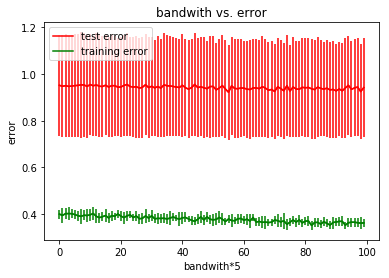

In [32]:
#Task 2.3

import random;
from random import choice;

def k_fold_cross_validation_RBF(data, k,lamda,bandwith): 
    
    n_data = data.shape[0];
    test_size = int(n_data/k);   
    
    #loop over k fold (each time leave one out to make a test set)  
    
    all_errors_test  = []
    all_errors_train = []
    for i in range(k):
        leave_out_data = data[test_size*i:test_size*(i+1),:];
        training_data  = data[0:test_size*i,:];
        training_data  = np.vstack((training_data,data[test_size*(i+1):,:]));
        
        # computing feature matrix
        X_training, y_training = training_data[:,:-1],training_data[:,-1];
        
        # generate random centers
        randomRow = np.arange(X_training.shape[0]);
        np.random.shuffle(randomRow);
        #print(randomRow);
        randomCenter = np.zeros((100,13));

        for i in range(0,100):
            for j in range(0,13):
                row = randomRow[i];
                randomCenter[i][j] = X_training[row][j];

        PHI_training_data = RBF_Features(X_training,randomCenter,bandwith);    
        
        Identity = np.identity(PHI_training_data.shape[1]) # identity matrix

        beta__ = dot(dot(inv(np.add(dot(PHI_training_data.T, PHI_training_data),lamda*Identity)), 
                         PHI_training_data.T), y_training);
        
        #computing error on the training dataset
        err_train = error_computing(PHI_training_data,beta__,y_training)
       
    
        #computing error on the leave_out dataset
        X_test, y_test = leave_out_data[:,:-1],leave_out_data[:,-1]
        PHI_leave_out_data = RBF_Features(X_test,randomCenter,bandwith);
        err_test = error_computing(PHI_leave_out_data,beta__,y_test)
        
        # add this test/training error for computing statistics
        all_errors_test.append(err_test)
        all_errors_train.append(err_train)
        
        
    # returning the mean and standard deviation of the cross-validated errors
    return np.mean(all_errors_test), np.std(all_errors_test),np.mean(all_errors_train), np.std(all_errors_train)


def five_fold_cross_validation_RBF():
    k_fold = 5;
    lamda = 0.5;
    num_candidates = 100;
    regular = np.zeros([num_candidates,5])

    best_bandwith = 0;
    best_cost = 10000;

    # loop over num_candidates possible candidates of lambda
    for k in range(1,101):
        bandwith = 0.2 * k; 
        mean_test, std_test, mean_train, mean_std = k_fold_cross_validation_RBF(data,k_fold,lamda,bandwith);
        regular[k-1,0] = bandwith;
        regular[k-1,1:] = mean_test, std_test, mean_train, mean_std;

        if best_cost > mean_test:
            best_cost = mean_test;
            best_bandwith = bandwith;



    fig = plt.figure();
    fig = fig.add_subplot(1, 1, 1);
    plt.plot(np.arange(num_candidates),regular[:,1],'red',label="test error");
    plt.plot(np.arange(num_candidates),regular[:,3],'green',label="training error");

    # plotting the error bars (with standard deviations)
    plt.errorbar(np.arange(num_candidates),regular[:,1], yerr=regular[:,2], color='red');
    plt.errorbar(np.arange(num_candidates),regular[:,3], yerr=regular[:,4], color='green');

    plt.title(r"bandwith vs. error");
    plt.legend(loc='upper left');
    plt.xlabel(r'bandwith*5');
    plt.ylabel('error');
    plt.draw();

    print('best bandwith = ',best_bandwith);
    print('best best_cost = ',best_cost);


print("RBF feature with five_fold_cross_validation:");

X_training, y_training = data[:,:-1],data[:,-1];



five_fold_cross_validation_RBF();